In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

input_path =r"data.xlsx"
# Đọc dữ liệu từ file Excel
data = pd.read_excel(input_path)
df = pd.DataFrame(data)
df.head(5)


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [3]:
# tiền xử lý dữ liệu 
# Kiểm tra kiểu dữ liệu của các cột
print("Kiểu dữ liệu của các cột:")
print(df.dtypes)


Kiểu dữ liệu của các cột:
Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                         float64
Customer Name                    object
Age                               int64
Gender                           object
Churn                             int64
dtype: object


In [4]:
# kiểm tra dữ liệu bị null
missing_count = df.isnull().sum()
print("Số ô bị thiếu theo từng cột:")
print(missing_count)

Số ô bị thiếu theo từng cột:
Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [5]:
# thay thế những giá trị bị null
df['Returns'] = df['Returns'].fillna(0)

In [6]:
# hàng customer age và age là như nhau nên xóa 1 cột
# remove Age
df = df.drop('Age', axis=1)
df.head(5)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,Female,1


In [7]:
# RFM 
# RECENCY (R): Days since last purchase
# FREQUENCY (F): Total number of purchases
# MONETARY VALUE (M): Total money this customer spent.

In [8]:
# recency
# Lấy ngày hiện tại
today = datetime.today().date()


In [9]:
# Tạo DataFrame mới để nhóm theo 'Customer ID' và lấy ngày mua cuối cùng
recency_df = df.groupby(by='Customer ID', as_index=False)['Purchase Date'].max()
# Chỉ lấy phần ngày từ cột 'Purchase Date'
recency_df['LastPurchaseDate'] = recency_df['Purchase Date'].dt.date

recency_df = recency_df[['Customer ID', 'LastPurchaseDate']]

recency_df


,Customer ID,LastPurchaseDate
0,1,2023-07-19
1,2,2022-11-21
2,3,2023-06-18
3,4,2023-05-12
4,5,2023-03-28
...,...,...
49668,49996,2022-12-18
49669,49997,2023-07-28
49670,49998,2023-09-04
49671,49999,2022-07-22


In [ ]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (today - x).days)
# xóa những khách hàng cách đây 500 ngày
recency_df = recency_df[recency_df['Recency'] <= 730]
recency_df.head()

,Customer ID,LastPurchaseDate,Recency
0,1,2023-07-19,481
1,2,2022-11-21,721
2,3,2023-06-18,512
3,4,2023-05-12,549
4,5,2023-03-28,594


In [14]:
# Xóa cột LastPurchaseDate vì không cần thiết nữa
recency_df.drop('LastPurchaseDate', axis=1, inplace=True)

C:\Users\HELLO\AppData\Local\Temp\ipykernel_55548\1214648563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency_df.drop('LastPurchaseDate', axis=1, inplace=True)


In [15]:
# frequence
# tính toan tần suất mua hàng
frequency_df = df.groupby(by='Customer ID', as_index=False)['Purchase Date'].count()

frequency_df.columns = ['Customer ID', 'Frequency']

frequency_df.head()


,Customer ID,Frequency
0,1,1
1,2,3
2,3,8
3,4,4
4,5,8


In [16]:
# Monetary
monetary_df = df.groupby(by='Customer ID',as_index=False)['Total Purchase Amount'].sum()
monetary_df.columns = ['Customer ID','Monetary']
monetary_df.head()


,Customer ID,Monetary
0,1,3491
1,2,7988
2,3,22587
3,4,8715
4,5,12524


In [17]:
# RFM table
# gộp recency với frequency
temp_df = recency_df.merge(frequency_df,on='Customer ID')
# gộp temp_df với monetary
rfm_df = temp_df.merge(monetary_df,on='Customer ID')

rfm_df.set_index('Customer ID',inplace=True)

rfm_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
1,481,1,3491
2,721,3,7988
3,512,8,22587
4,549,4,8715
5,594,8,12524


In [18]:
def calculate_quartiles(data):
    """Tính toán Q1, Q2, Q3 và IQR cho dữ liệu đã sắp xếp."""
    sorted_data = np.sort(data)  # Sắp xếp dữ liệu theo thứ tự tăng dần
    Q1 = np.percentile(sorted_data, 25)
    Q2 = np.percentile(sorted_data, 50)
    Q3 = np.percentile(sorted_data, 75)
    IQR = Q3 - Q1
    return Q1, Q2, Q3, IQR

quartiles = {}
for column in rfm_df.columns:
    Q1, Q2, Q3, IQR = calculate_quartiles(rfm_df[column])
    quartiles[column] = {'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'IQR': IQR}
    

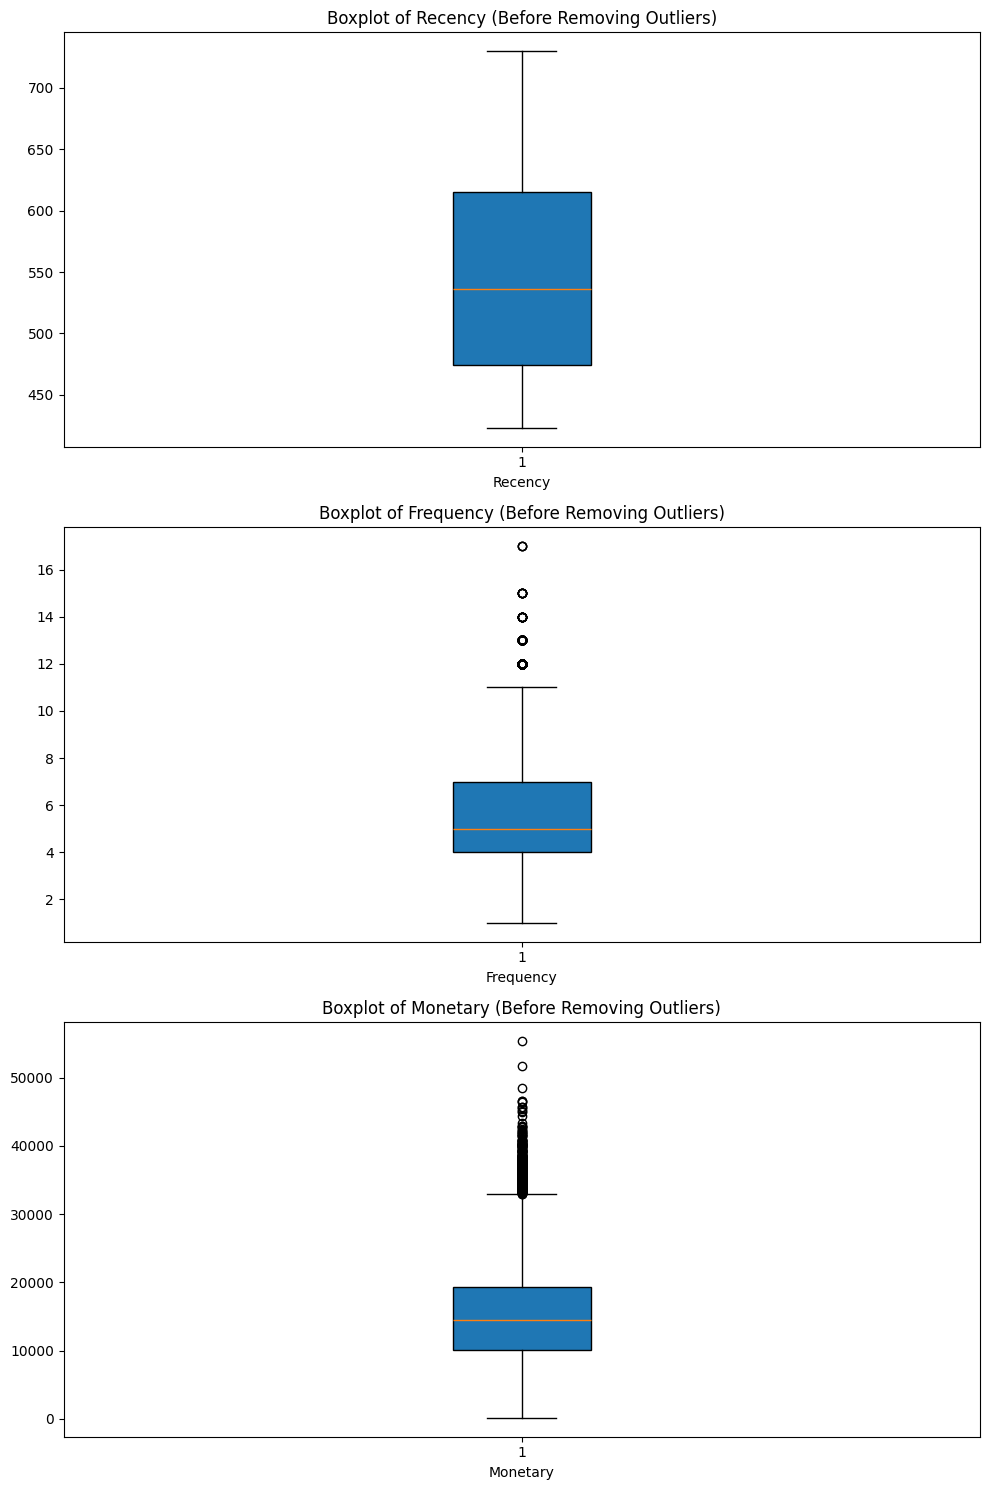

In [19]:
# Vẽ boxplot trước khi xử lý outliers
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, column in enumerate(rfm_df.columns):
    Q1, Q2, Q3, IQR = quartiles[column].values()
    axs[i].boxplot(rfm_df[column], vert=True, patch_artist=True)
    axs[i].set_title(f'Boxplot of {column} (Before Removing Outliers)')
    axs[i].set_xlabel(column)

plt.tight_layout()
plt.show()



In [20]:
# Lọc outliers
filtered_rfm_df = rfm_df.copy()
for column in rfm_df.columns:
    Q1, Q2, Q3, IQR = quartiles[column].values()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_rfm_df = filtered_rfm_df[
        (filtered_rfm_df[column] >= lower_bound) & (filtered_rfm_df[column] <= upper_bound)
    ]

print("Số phần tủ trước khi bỏ outline:", rfm_df.shape[0])
print("Số phần tủ sau khi bỏ outline:", filtered_rfm_df.shape[0])

Số phần tủ trước khi bỏ outline: 34046
Số phần tủ sau khi bỏ outline: 33553


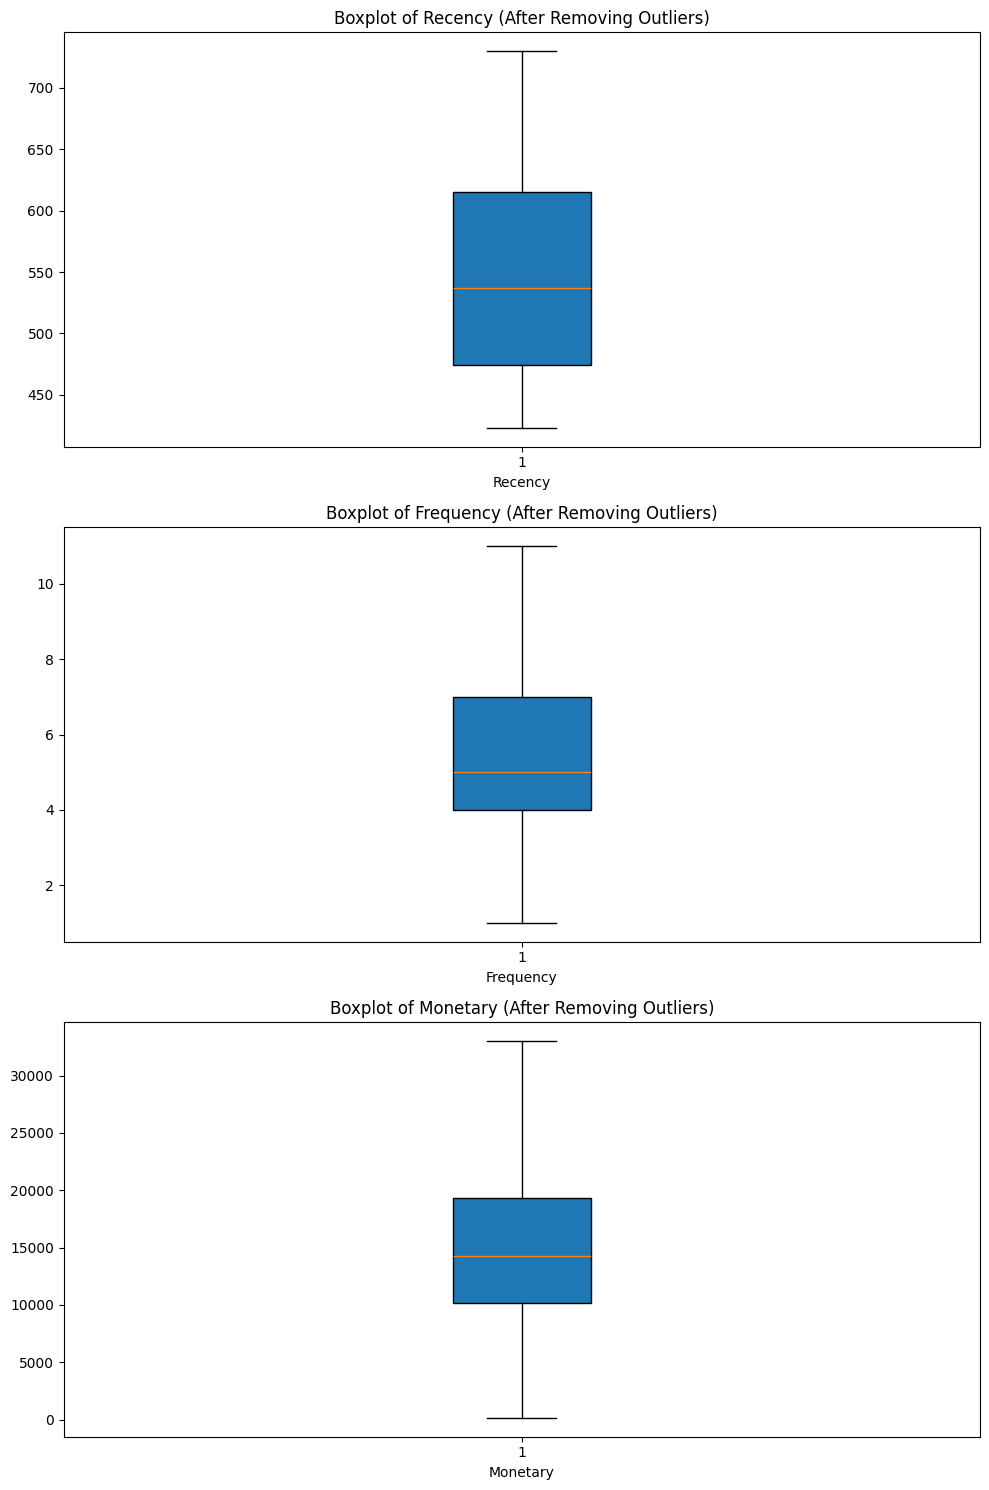

In [21]:
# plot sau khi loại bỏ outline
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, column in enumerate(rfm_df.columns):
    Q1 = quartiles[column]['Q1']
    Q3 = quartiles[column]['Q3']
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    if lower_bound < filtered_rfm_df[column].min():
        lower_bound = filtered_rfm_df[column].min()

    upper_bound = Q3 + 1.5 * IQR
    if upper_bound > filtered_rfm_df[column].max():
        upper_bound = filtered_rfm_df[column].max()

    box_data = [lower_bound, Q1, np.median(filtered_rfm_df[column]), Q3, upper_bound]

    # Create the boxplot
    axs[i].boxplot(box_data, vert=True, patch_artist=True)
    axs[i].set_title(f'Boxplot of {column} (After Removing Outliers)')
    axs[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [22]:
# chuẩn hóa min_max

df_normalized = (filtered_rfm_df -filtered_rfm_df.min() )/(filtered_rfm_df.max() - filtered_rfm_df.min())

df_normalized.head()


,Recency,Frequency,Monetary
Customer ID,,,
1,0.188925,0.0,0.101504
2,0.970684,0.2,0.238416
3,0.289902,0.7,0.682884
4,0.410423,0.3,0.260549
5,0.557003,0.7,0.376515


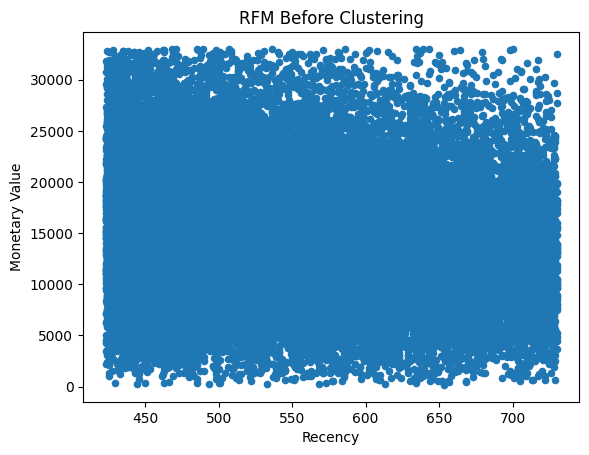

In [23]:
# Vẽ biểu đồ phân tán trước khi phân cụm

filtered_rfm_df.plot(kind='scatter', x='Recency', y='Monetary')
plt.title('RFM Before Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.show()


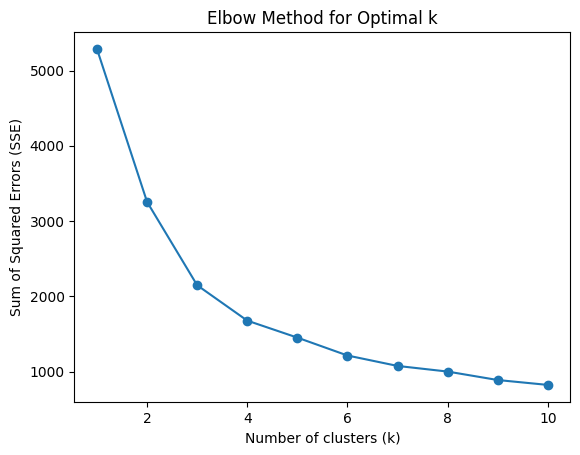

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chọn số cụm tối ưu bằng phương pháp Elbow
sse = []  # Danh sách để lưu trữ giá trị SSE (Sum of Squared Errors)
k_range = range(1, 11)  # Thử nghiệm k từ 1 đến 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Sử dụng random_state
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)  # inertia_ là tổng khoảng cách bình phương

# Vẽ biểu đồ Elbow
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [25]:
# Áp dụng K-means với số cụm là 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)

# Thêm nhãn cụm vào DataFrame
filtered_rfm_df['Cluster'] = kmeans.labels_
filtered_rfm_df.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
1,481,1,3491,2
2,721,3,7988,1
3,512,8,22587,0
4,549,4,8715,2
5,594,8,12524,3


In [26]:
filtered_rfm_df.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,481.718491,7.606204,21417.954136
1,644.677482,3.667360,9418.119523
2,490.814459,4.266480,11004.029948
3,627.424565,6.734403,18959.031344


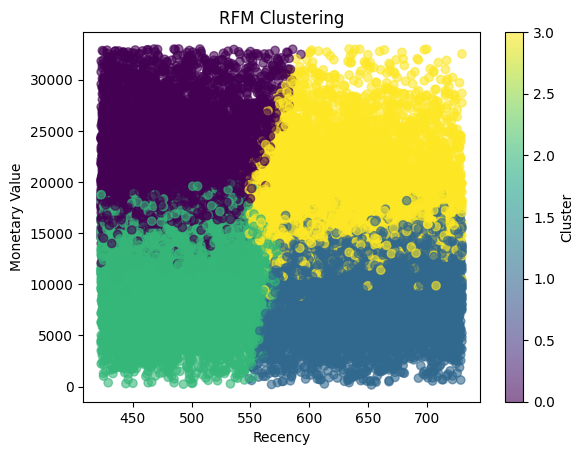

In [27]:
# Vẽ biểu đồ phân tán
plt.scatter(filtered_rfm_df['Recency'], filtered_rfm_df['Monetary'], 
            c=filtered_rfm_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('RFM Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.colorbar(label='Cluster')
plt.show()


In [28]:
# Thêm cột cụm vào DataFrame
filtered_rfm_df['Cluster'] = kmeans.labels_

# Tính toán các thống kê mô tả cho mỗi cụm
cluster_summary = filtered_rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max']
}).reset_index()
cluster_summary.set_index('Cluster', inplace=True)

cluster_summary


Recency                  Frequency                     Monetary  \
               mean median  min  max      mean median min max          mean   
Cluster                                                                       
0        481.718491  477.0  423  593  7.606204    7.0   5  11  21417.954136   
1        644.677482  643.0  549  730  3.667360    4.0   1   7   9418.119523   
2        490.814459  489.0  423  575  4.266480    4.0   1   8  11004.029948   
3        627.424565  620.5  543  730  6.734403    7.0   4  11  18959.031344   

                               
          median   min    max  
Cluster                        
0        20889.0  9297  33003  
1         9658.5   157  18842  
2        11301.0   228  19835  
3        18364.5  7643  32997

In [29]:
# thêm cột cluster vào dataframe ban đầu và xóa đi những cột có Cluster trống
print(df.columns)
df = df.merge(filtered_rfm_df[['Cluster']], left_on='Customer ID', right_index=True, how='left')
# Drop rows where 'Cluster' column is missing (NaN values)
df = df.dropna(subset=['Cluster'])

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Gender', 'Churn'],
      dtype='object')


Số lượng khách hàng theo Product Category cho từng cụm:
Product Category  Books  Clothing  Electronics   Home
Cluster                                              
0.0               18681     18858        12575  12409
1.0                7910      8040         5238   5261
2.0               14704     14641         9809   9710
3.0               13548     13294         9104   8959


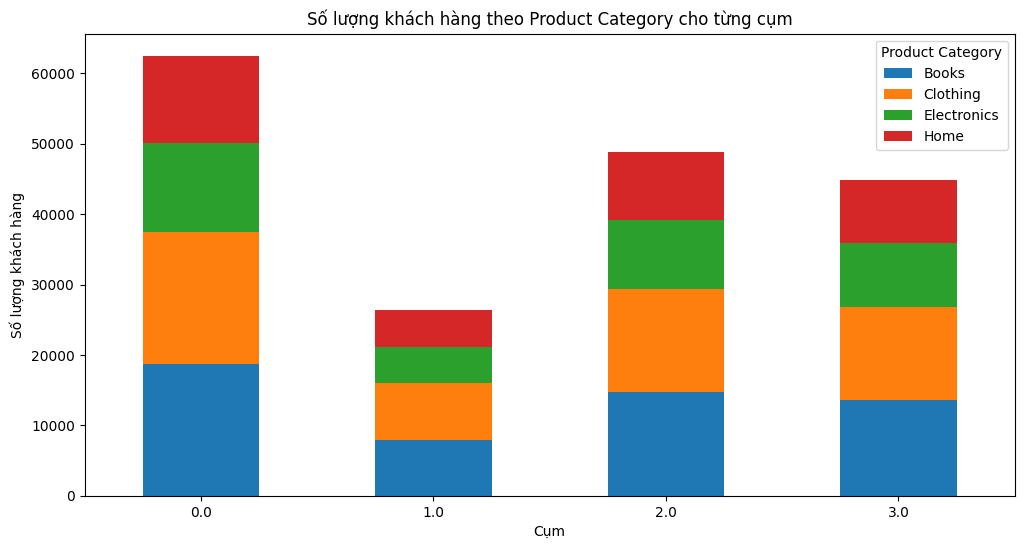

In [30]:
product_category_analysis = df.groupby(['Cluster', 'Product Category']).size().unstack(fill_value=0)
print("Số lượng khách hàng theo Product Category cho từng cụm:")
print(product_category_analysis)

# Vẽ biểu đồ số lượng khách hàng theo Product Category cho từng cụm
product_category_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Số lượng khách hàng theo Product Category cho từng cụm')
plt.xlabel('Cụm')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Product Category')
plt.xticks(rotation=0)
plt.show()


Độ tuổi trung bình của khách hàng trong từng cụm:
           count       mean        std   min   25%   50%   75%   max
Cluster                                                             
0.0      62523.0  44.166723  15.337257  18.0  31.0  44.0  57.0  70.0
1.0      26449.0  43.473931  15.223792  18.0  30.0  43.0  57.0  70.0
2.0      48864.0  43.546926  15.421717  18.0  30.0  43.0  57.0  70.0
3.0      44905.0  44.095401  15.316551  18.0  31.0  44.0  57.0  70.0


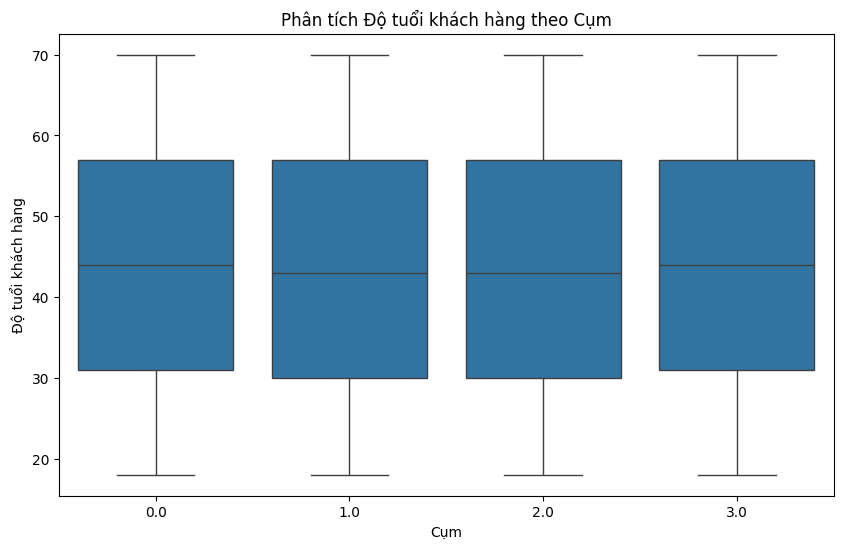

In [31]:
age_analysis = df.groupby('Cluster')['Customer Age'].describe()
print("\nĐộ tuổi trung bình của khách hàng trong từng cụm:")
print(age_analysis)
import seaborn as sns
# Vẽ biểu đồ boxplot cho Customer Age theo cụm
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Customer Age', data=df)
plt.title('Phân tích Độ tuổi khách hàng theo Cụm')
plt.xlabel('Cụm')
plt.ylabel('Độ tuổi khách hàng')
plt.show()

Số lượng khách hàng theo Giới tính cho từng cụm:
Gender   Female   Male
Cluster               
0.0       31533  30990
1.0       13215  13234
2.0       24542  24322
3.0       22437  22468


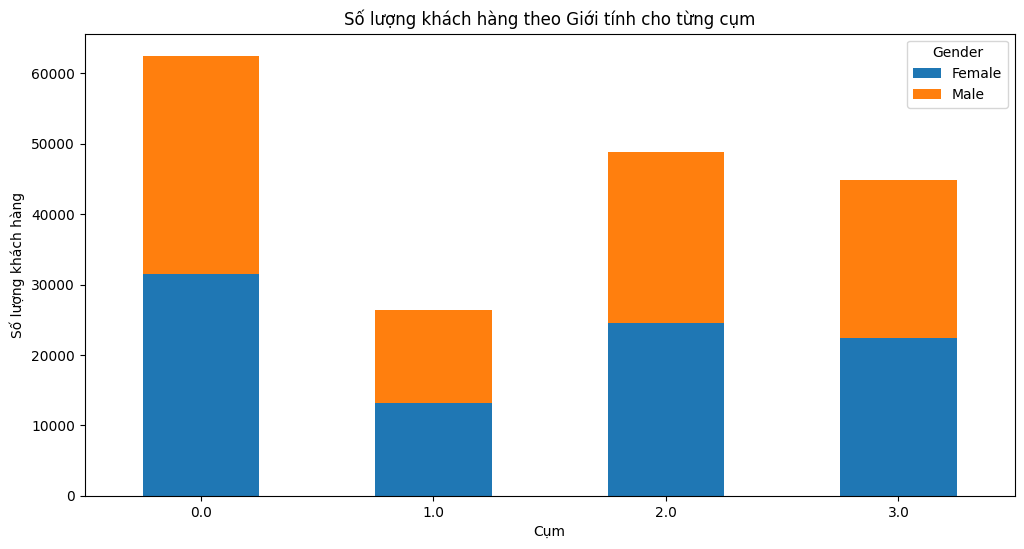

In [32]:
# phân giới tính cho từng cụm
# Vẽ biểu đồ số lượng khách hàng theo Giới tính cho từng cụm

# Phân tích số lượng khách hàng theo Giới tính cho từng cụm
gender_analysis = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
print("Số lượng khách hàng theo Giới tính cho từng cụm:")
print(gender_analysis)

# Vẽ biểu đồ số lượng khách hàng theo Giới tính cho từng cụm
gender_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Số lượng khách hàng theo Giới tính cho từng cụm')
plt.xlabel('Cụm')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

In [33]:
# lưu vào file excel
import pandas as pd
with pd.ExcelWriter('data.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='data_cluster', index=False)